Handwriting recognition with Python

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


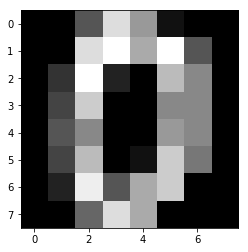

In [3]:
print(digits.images[0])
plt.imshow(digits.images[0],cmap=plt.get_cmap('gray'))

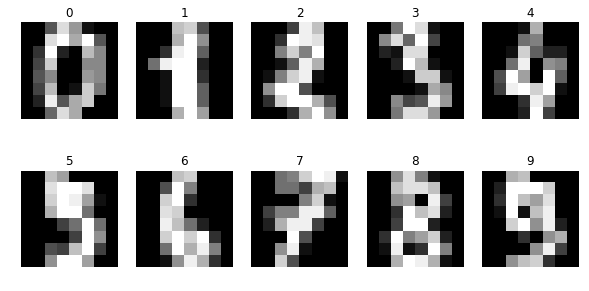

In [4]:
images_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(10,5))
for ind,(img,label) in enumerate(images_labels[:10]):
    plt.subplot(2,5,ind+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title('%i'%label)

In [5]:
from sklearn import ensemble
n_samp=len(digits.images)
x=digits.images.reshape((n_samp,-1))
y=digits.target

train_ind=np.random.choice(range(len(x)),int(len(x)/5)) #- training
valid_ind=[i for i in range(len(x)) if i not in train_ind] #- validation

train_img=[x[i] for i in train_ind]
train_target=[y[i] for i in train_ind]

valid_img=[x[j] for j in valid_ind]
valid_target=[y[j] for j in valid_ind]

classifier=ensemble.RandomForestClassifier()
classifier.fit(train_img,train_target)

score=classifier.score(valid_img,valid_target)

print("Random tree classifier:\n")
print("Score\t:",str(score))

Random tree classifier:

Score	: 0.8703578663065497


[856, 238, 1581, 1665, 792, 1295]


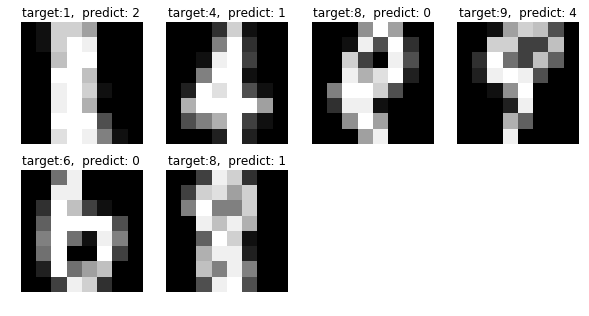

In [6]:
wrongs=[]
n=0
for ii in np.random.choice(valid_ind,50):
    diff=y[ii]-classifier.predict(x[ii].reshape(1,-1))[0]
    #print(diff)
    if diff!=0:
        wrongs.append(ii)
        

#- plot the ones with diff !=0
print(wrongs)
plt.figure(figsize=(10,5))
n=0
for ind in wrongs:
    plt.subplot(2,len(wrongs)/2+1,n+1)
    plt.imshow(digits.images[ind],cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("target:{},  predict: {}".format(y[ind],classifier.predict(x[ind].reshape(1,-1))[0]))
    n=n+1